In [46]:
# Dataset obtained from my own health stats over a period of last 28 weeks recorded using a GARMIN wrist smart watch. 
# Link for dataset = https://docs.google.com/spreadsheets/d/1vITf3j32xciD48-h5KwC-qILRIPlDnRMhmTEovqFHE8/edit?usp=drive_link

In [47]:
import pandas as pd
sleep_data = pd.read_csv(r"/Users/navadeep/ML/Sleep_data/merged_sleep_data.csv")

In [48]:
df = sleep_data.copy()
df.head()

,Sleep Score 4 Weeks,Score,Resting Heart Rate,Body Battery,Pulse Ox,Respiration,HRV Status,Overnight HRV,Quality,Duration,Sleep Need,Bedtime,Wake Time
0,2025-09-26,84,43,62,--,13.39,58,68ms,Good,8h 1min,8h 40min,9:58 PM,6:14 AM
1,2025-09-25,74,47,70,--,13.87,56,58ms,Fair,6h 39min,8h 40min,12:49 AM,7:47 AM
2,2025-09-24,73,47,62,--,13.53,56,56ms,Fair,5h 47min,8h 30min,1:35 AM,7:31 AM
3,2025-09-23,84,46,76,--,13.00,56,61ms,Good,7h 15min,9h 0min,12:13 AM,7:49 AM
4,2025-09-22,68,50,58,--,14.15,57,52ms,Fair,5h 29min,9h 0min,2:08 AM,7:42 AM


In [49]:
df['Overnight HRV'] = df['Overnight HRV'].str.replace('ms', '', regex=False)
df['Overnight HRV'] = pd.to_numeric(df['Overnight HRV'])
df['Resting Heart Rate'] = pd.to_numeric(df['Resting Heart Rate'])

In [50]:
df.head()

,Sleep Score 4 Weeks,Score,Resting Heart Rate,Body Battery,Pulse Ox,Respiration,HRV Status,Overnight HRV,Quality,Duration,Sleep Need,Bedtime,Wake Time
0,2025-09-26,84,43,62,--,13.39,58,68,Good,8h 1min,8h 40min,9:58 PM,6:14 AM
1,2025-09-25,74,47,70,--,13.87,56,58,Fair,6h 39min,8h 40min,12:49 AM,7:47 AM
2,2025-09-24,73,47,62,--,13.53,56,56,Fair,5h 47min,8h 30min,1:35 AM,7:31 AM
3,2025-09-23,84,46,76,--,13.00,56,61,Good,7h 15min,9h 0min,12:13 AM,7:49 AM
4,2025-09-22,68,50,58,--,14.15,57,52,Fair,5h 29min,9h 0min,2:08 AM,7:42 AM


In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

X = df[['Overnight HRV', 'Resting Heart Rate']] 
y = df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(
    max_depth=3, 
    random_state=42
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


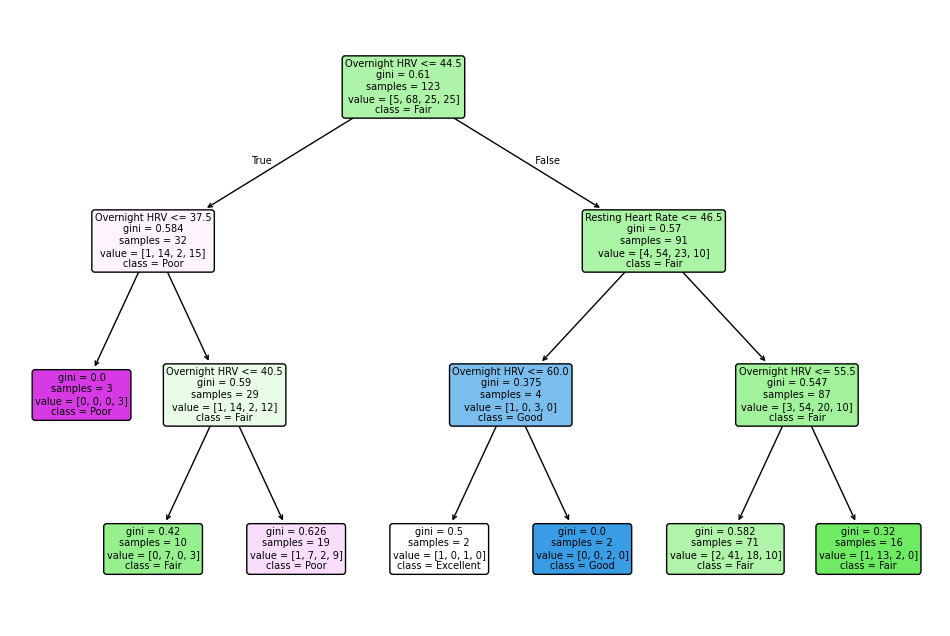

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, 
          feature_names=['Overnight HRV', 'Resting Heart Rate'],  # Replace with your feature names
          class_names=clf.classes_,  # Your categorical classes
          filled=True, 
          rounded=True)
plt.show()

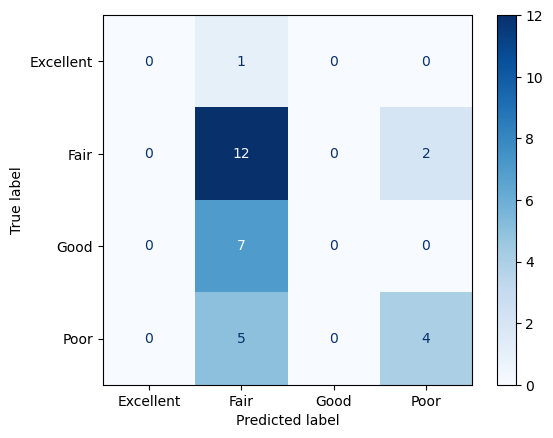

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

labels = y.unique()
labels.sort()

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues) # Use a color map, like 'Blues'
plt.show()